In [1]:

import math
import numpy as np
import numpy.linalg as npla

import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.interpolate import make_interp_spline

%matplotlib inline
#%matplotlib tk

np.set_printoptions(precision = 4)

# Import `load_workbook` module from `openpyxl`
from openpyxl import load_workbook



In [2]:
def drawVelocity(pathname):
    # Load in the workbook
    wb = load_workbook(pathname)

    # Get sheet names
    print(wb.sheetnames)
    
    sheet = wb["Curves"]

    length = sheet.max_row
    #First three values in velocity are invalid, as well as last value
    time = np.zeros(length-4);
    velocity= np.zeros(length-4);
    #Loop through and assign time and velocity values
    index = 0;
    for cellObj in sheet['D4':'E'+str(sheet.max_row-1)]:
        time[index] = cellObj[0].value
        velocity[index] = cellObj[1].value
        index+=1
    #return them
    return time,velocity


def drawForce(pathname):
    # Load in the workbook
    wb = load_workbook(pathname)

    # Get sheet names
    print(wb.sheetnames)

    sheet = wb["Curves"]
    
    #Get the maximum row number
    length = sheet.max_row
    #For Force, the first two values are invalid
    time = np.zeros(length-2);
    force= np.zeros(length-2);
    #loop through and assign seconds and force total values
    index = 0;
    for cellObj in sheet['G3':'J'+str(sheet.max_row)]:
        time[index] = cellObj[0].value
        force[index] = cellObj[3].value
        index+=1
    #return the two arrays
    return time,force 

def norm(data):
    #min = np.min(data)
    #max = np.max(data)
    #return [(val - min) / (max - min) for val in data]]
    return data/ np.linalg.norm(data)

def smooth(time,y):
    x_new = np.linspace(time.min(), time.max(), 300)
    a_BSpline = make_interp_spline(time, y)
    y_new = a_BSpline(x_new)

    return x_new,y_new

/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


['Curves']
['Curves']
['Curves']
['Curves']


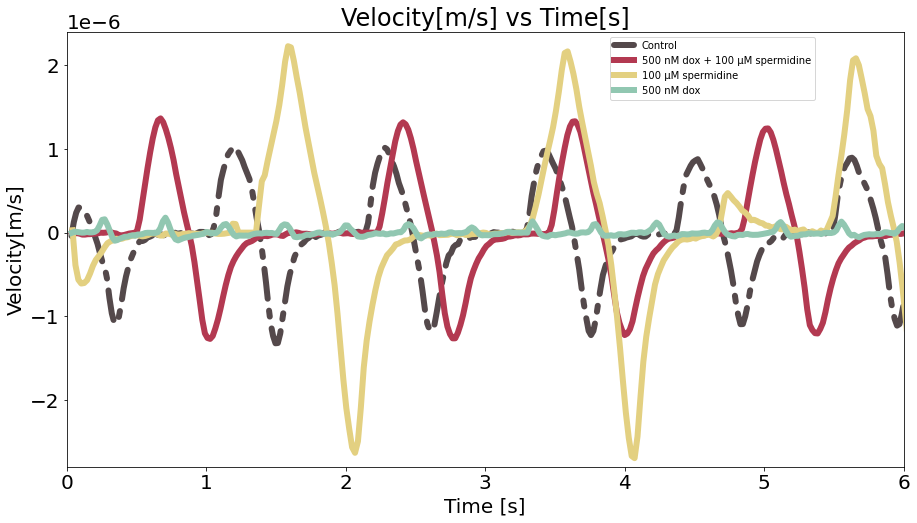

In [10]:
a,b= drawVelocity('spermidineExcel/Cell_4_exp_date_12_30_20_CONTROL.xlsx')
c,d=drawVelocity('spermidineExcel/Cell_2_exp_12_30_20_DOX.xlsx')
e,f = drawVelocity('spermidineExcel/Cell_1__exp_12_30_20_SPERMIDINE.xlsx')
g,h = drawVelocity('spermidineExcel/Cell_1_RF_40X.xlsx')
#Smooth the values

plt.subplots(figsize=(15, 8))
plt.plot(a,b,label = "Control",color = "#54494B",linewidth=6,linestyle=(0, (5, 2, 1, 2)),dash_capstyle='round')

plt.plot(e,f, label = "500 nM dox + 100 μM spermidine",color = "#B33951",linewidth=6)
plt.plot(g,h,label = "100 μM spermidine",linewidth=6,color = "#E3D081")
plt.plot(c,d,label = "500 nM dox",color = "#91C7B1",linewidth=6)
plt.rcParams['font.size'] = 20
plt.title('Velocity[m/s] vs Time[s]')
plt.xlabel('Time [s]')
plt.ylabel('Velocity[m/s]')

plt.xticks(np.arange(0, 11, step=1))
plt.legend(bbox_to_anchor=(.9,1), loc="upper right",prop={'size': 10})
#plt.axis([0,10,-.15,.2])
plt.axis([0,6,-2.8e-6,2.4e-6])
plt.show()


/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


['Curves']
['Curves']
['Curves']


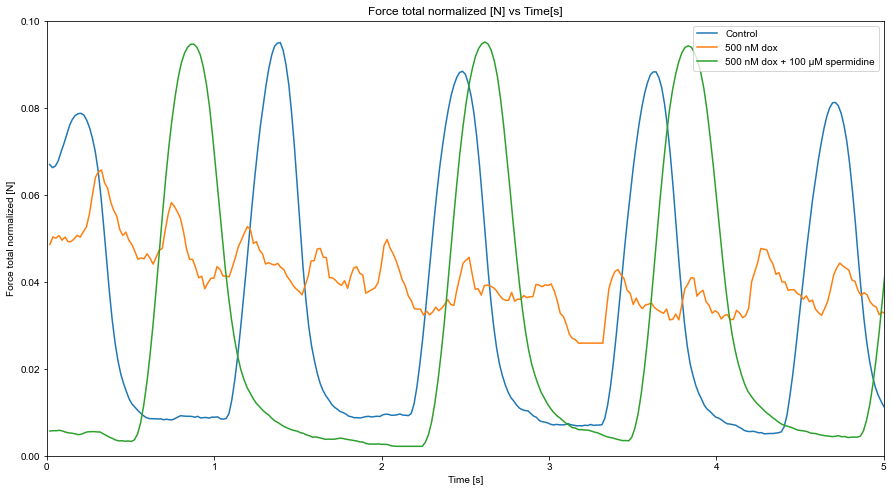

In [11]:
a,b= drawForce('spermidineExcel/Cell_4_exp_date_12_30_20_CONTROL.xlsx')
c,d=drawForce('spermidineExcel/Cell_2_exp_12_30_20_DOX.xlsx')
e,f = drawForce('spermidineExcel/Cell_1__exp_12_30_20_SPERMIDINE.xlsx')
#Smooth the values
#a,b = smooth(a,norm(b))
#c,d = smooth(c,norm(d))
#e,f = smooth(e,norm(f))

plt.subplots(figsize=(15, 8))
plt.plot(a,norm(b),label = "Control")
plt.plot(c,norm(d),label = "500 nM dox")
plt.plot(e,norm(f), label = "500 nM dox + 100 μM spermidine")
#Title is the title for the whole graph, with the Helvetica font
plt.title('Force total normalized [N] vs Time[s]')
plt.xlabel('Time [s]')
plt.ylabel('Force total normalized [N]')
plt.legend()
#This bottom command changes the font size
plt.rcParams['font.size'] = 20
#Another way to change the whole font family is below, for all labels not explicitly set
plt.rcParams["font.family"] = "Arial"
#The axis line can change the min and max for X axis, Y axis
plt.axis([0,5,0,.1])
plt.show()



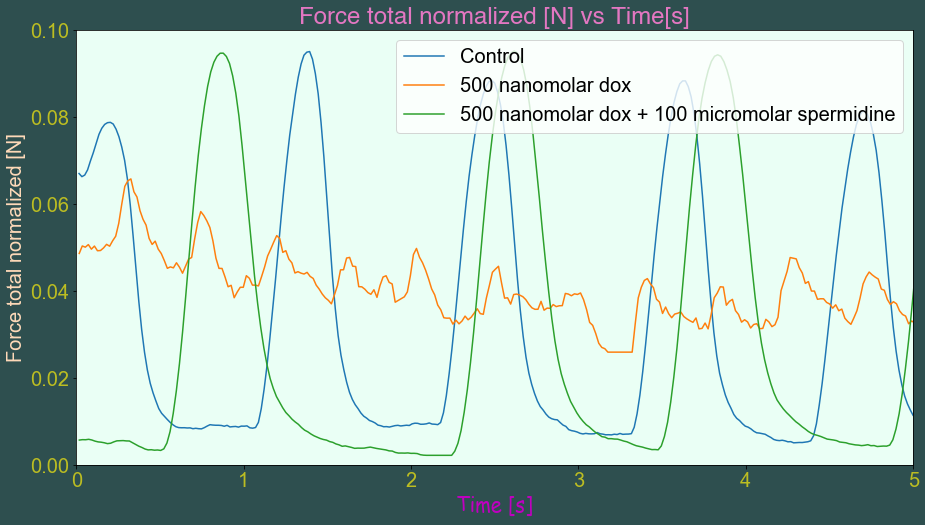

In [5]:

####GRAPH CUSTOMIZATION###############
#Custom FONTS from matlplotlib library can be imported this way, and then added into labels with **
csfont = {'fontname':'Comic Sans MS'}
hfont = {'fontname':'Helvetica'}
#CUSTOM COLOR
# 1. rgb color ex: facecolor=(.18, .31, .31)
# 2. hex string: '#eafff5'
# 3. shorthand RGB
# 4. grey level [0 1] ex: 0.5
# 5. a single letter string, i.e. one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
# 6.  X11/CSS4 ("html") color name, e.g. "blue"
# 7. xkcd color survey, prefixed with 'xkcd:' (e.g., 'xkcd:sky blue')
# 8. Cn" color spec, i.e. 'C' followed by a number ex: C0
#Figsize customizes the size of the graph for length and width
# 9. one of {'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
#'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'} which are the Tableau Colors 
fig,ax = plt.subplots(figsize=(15, 8),facecolor=(.18, .31, .31))
ax.set_facecolor('#eafff5')
#The label of a data shows up in the legend
plt.plot(a,norm(b),label = "Control")
plt.plot(c,norm(d),label = "500 nanomolar dox")
plt.plot(e,norm(f), label = "500 nanomolar dox + 100 micromolar spermidine")
#Title is the title for the whole graph, with the Helvetica font
plt.title('Force total normalized [N] vs Time[s]',**hfont, color='C6')
#X axis label with comic sans font
plt.xlabel('Time [s]',**csfont, color = 'm')
#Y axis label
plt.ylabel('Force total normalized [N]', color='peachpuff')
#x ticks will affect the min and max tick mark as well as the stepsize
#plt.xticks(np.arange(0, 5, step=1))
ax.tick_params(labelcolor='tab:olive')
#The command legend() creates the legend
plt.legend()
#This bottom command changes the font size
plt.rcParams['font.size'] = 20
#Another way to change the whole font family is below, for all labels not explicitly set
plt.rcParams["font.family"] = "Arial"
#The axis line can change the min and max for X axis, Y axis
plt.axis([0,5,0,.1])
#plt.show() is needed to display the plot
plt.show()


